# Meteorite Dataset Exploratory Data Analysis

This project is an interesting opportunity to explore data spatially.  I selected this dataset because it shows locations of meteorite landings around the world, with several variables including mass and type of meteorite.  My goal is to see where most meteorites fall and if there is a relationship between the location they fall and their various characteristics

In [ ]:
!pip install cartopy

In [ ]:
#tools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
meteorite_file = pd.read_csv('https://raw.githubusercontent.com/JoeRuggieroStudent/ML_Projects/main/meteorite-landings.csv')

In [ ]:
meteorite_file.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


Lets get the column names

In [ ]:
meteorite_file.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

Before we do anything, lets see where all of these meteorite samples actually are:

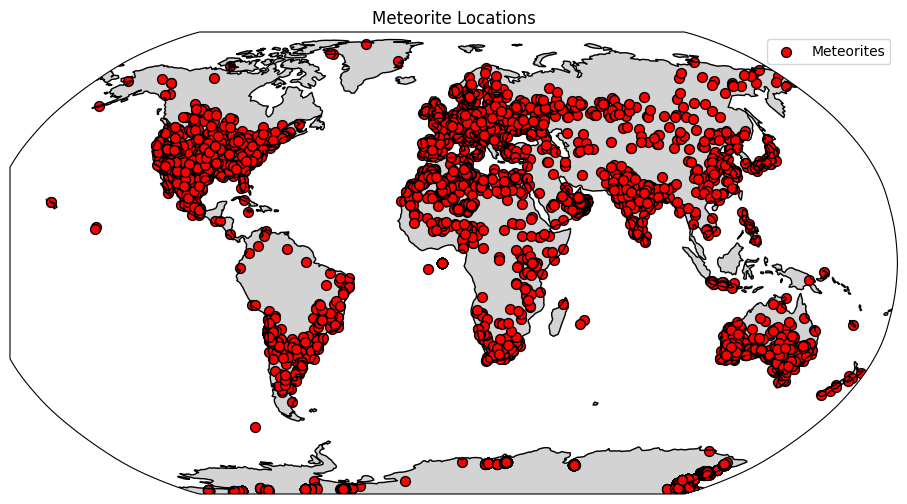

In [35]:
# Create the figure with a Robinson projection (global map)
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.Robinson()})

# Add land and coastlines
ax.add_feature(cfeature.LAND, color="lightgray")
ax.add_feature(cfeature.COASTLINE)

# Plot meteorite locations
ax.scatter(meteorite_file['reclong'], meteorite_file['reclat'],
           color="red", edgecolor="black", s=50, transform=ccrs.PlateCarree(), label="Meteorites")

# Title and legend
plt.title("Meteorite Locations")
plt.legend()
plt.show()

Lets do some exploratory data anlaysis:


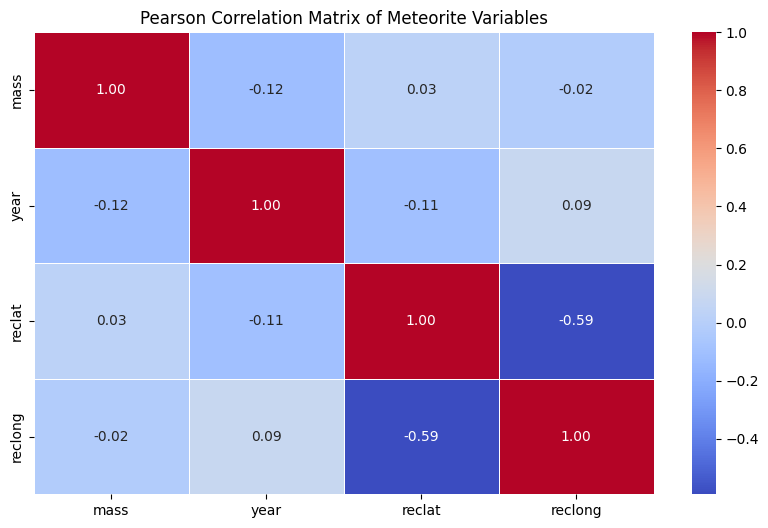

In [36]:
# Select numerical columns for correlation
numerical_data = meteorite_file[['mass', 'year', 'reclat', 'reclong']]  # Choose only numeric columns

# Calculate Pearson correlation matrix
correlation_matrix = numerical_data.corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Pearson Correlation Matrix of Meteorite Variables")
plt.show()

This is not very illumunating at all.  But lets explore this dataset more.  

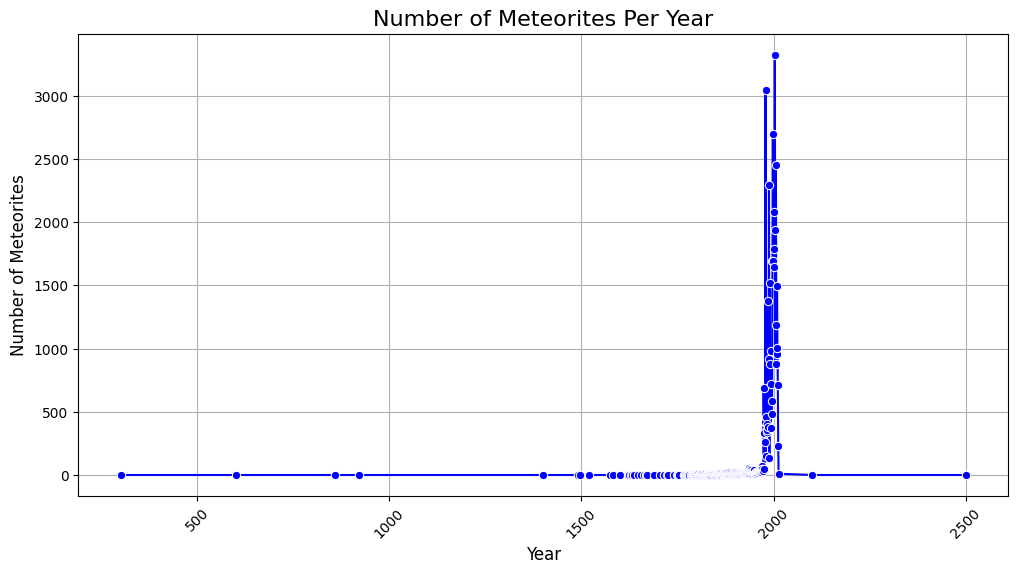

In [38]:
# Group by 'year' and count the number of meteorites per year
meteorites_per_year = meteorite_file.groupby('year').size().reset_index(name='count')

# Plot the number of meteorites per year as a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=meteorites_per_year, x='year', y='count', marker='o', color='b')

# Customize the plot
plt.title("Number of Meteorites Per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Meteorites", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()

It looks like there is a mistake in this dataset.  There cannot be a meteorite found in 2500.  Lets edit that.

In [39]:
# Filter out rows where the year is greater than 2025
meteorite_file_filtered = meteorite_file[meteorite_file['year'] <= 2025]

# Check the first few rows to verify
meteorite_file_filtered.head()


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


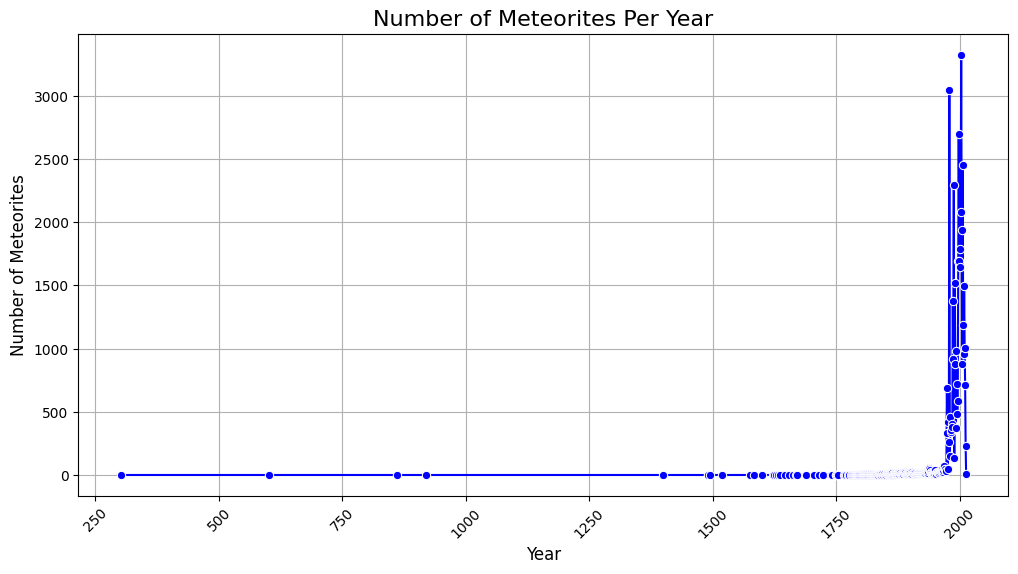

In [40]:
meteorites_per_year = meteorite_file_filtered.groupby('year').size().reset_index(name='count')

# Plot the number of meteorites per year as a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=meteorites_per_year, x='year', y='count', marker='o', color='b')

# Customize the plot
plt.title("Number of Meteorites Per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Meteorites", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()

It's interesting to see the historical part of this record.  These samples are all categorized into class.  Lets explore that:

<ipython-input-42-191e990f1a1f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=samples_per_recclass, x='recclass', y='count', palette='viridis')


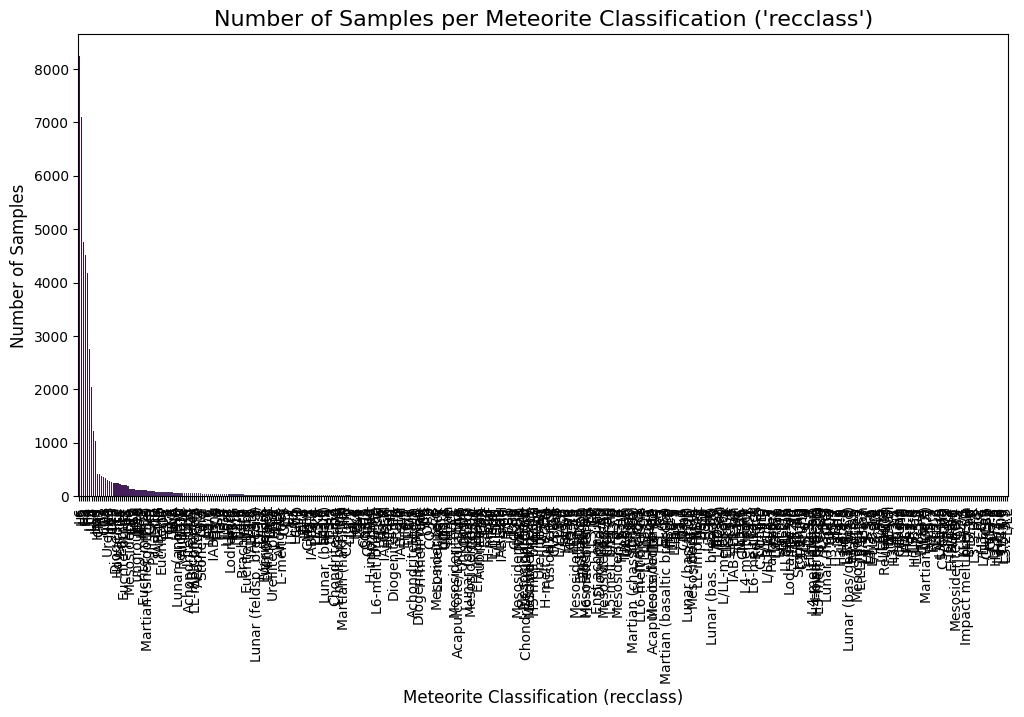

In [42]:

# Split 'recclass' by commas and create a new row for each classification
recclass_split = meteorite_file_filtered['recclass'].str.split(',', expand=True).stack().reset_index(drop=True)

# Count the occurrences of each classification
samples_per_recclass = recclass_split.value_counts().reset_index(name='count')
samples_per_recclass.columns = ['recclass', 'count']

# Plot the number of samples per 'recclass'
plt.figure(figsize=(12, 6))
sns.barplot(data=samples_per_recclass, x='recclass', y='count', palette='viridis')

# Customize the plot
plt.title("Number of Samples per Meteorite Classification ('recclass')", fontsize=16)
plt.xlabel("Meteorite Classification (recclass)", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


There are so many types of meteorite, lets try to simplify them down to larger categories:

<ipython-input-44-bb073e774a38>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteorite_file_filtered['recclass_first_letter'] = meteorite_file_filtered['recclass'].apply(classify_by_letter)
<ipython-input-44-bb073e774a38>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=samples_per_letter, x='starting_letter', y='count', palette='viridis')


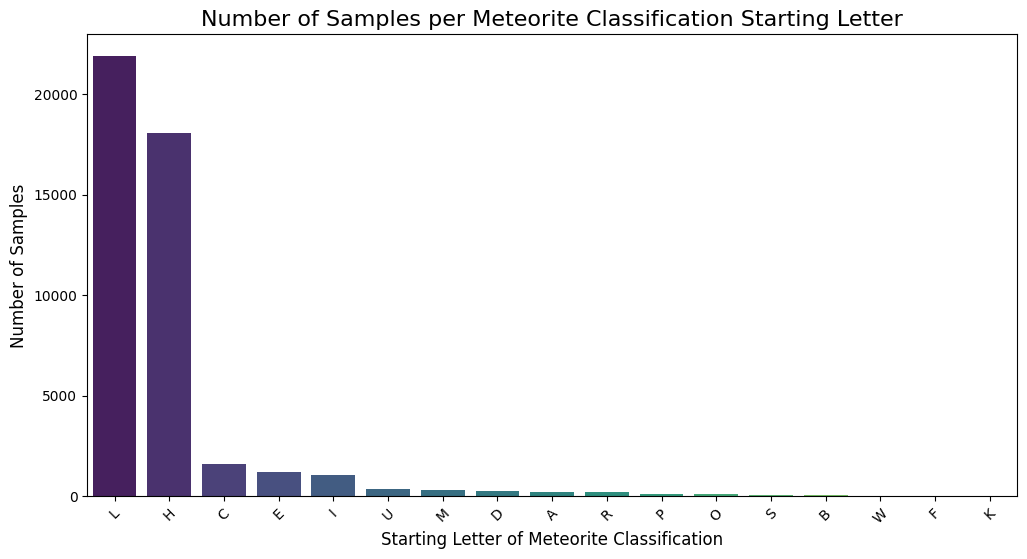

In [44]:
# Define a function to classify based on the starting letter
def classify_by_letter(recclass):
    if isinstance(recclass, str):
        return recclass[0].upper()  # Return the first letter (uppercase)
    return 'Unknown'

# Apply the function to each 'recclass' entry
meteorite_file_filtered['recclass_first_letter'] = meteorite_file_filtered['recclass'].apply(classify_by_letter)

# Split the first letter by commas (if multiple classifications) and create a new row for each classification
recclass_split = meteorite_file_filtered['recclass_first_letter'].str.split(',', expand=True).stack().reset_index(drop=True)

# Count the occurrences of each starting letter
samples_per_letter = recclass_split.value_counts().reset_index(name='count')
samples_per_letter.columns = ['starting_letter', 'count']

# Plot the number of samples per starting letter
plt.figure(figsize=(12, 6))
sns.barplot(data=samples_per_letter, x='starting_letter', y='count', palette='viridis')

# Customize the plot
plt.title("Number of Samples per Meteorite Classification Starting Letter", fontsize=16)
plt.xlabel("Starting Letter of Meteorite Classification", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



Cool, it looks like the most abundant meteorites are L-types and H-types.  This would be a good spot for some domain knowledge, but lets explore more

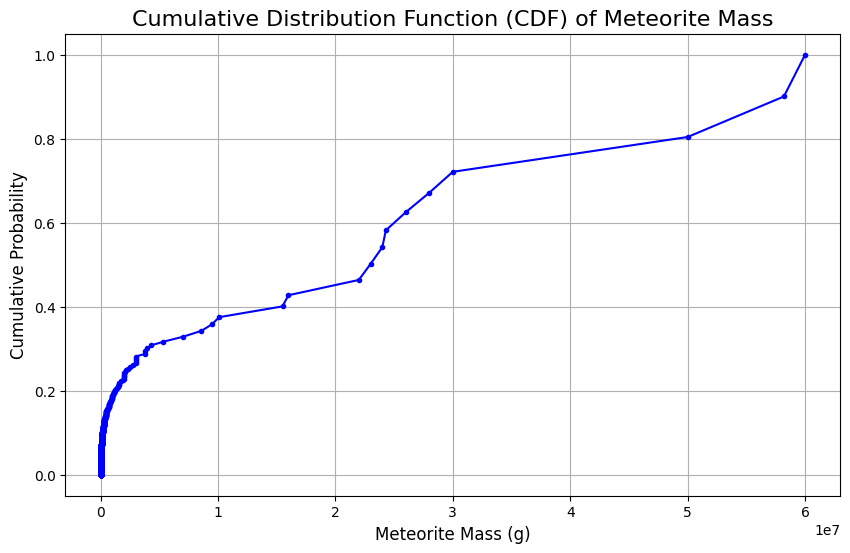

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove any NaN or zero values in the chosen column (e.g., 'mass')
meteorite_file_filtered = meteorite_file_filtered[meteorite_file_filtered['mass'] > 0]

# Sort the values and calculate the cumulative distribution
sorted_values = meteorite_file_filtered['mass'].sort_values()
cdf = sorted_values.cumsum() / sorted_values.sum()

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_values, cdf, marker='.', linestyle='-', color='b')

# Customize the plot
plt.title('Cumulative Distribution Function (CDF) of Meteorite Mass', fontsize=16)
plt.xlabel('Meteorite Mass (g)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.grid(True)
plt.show()


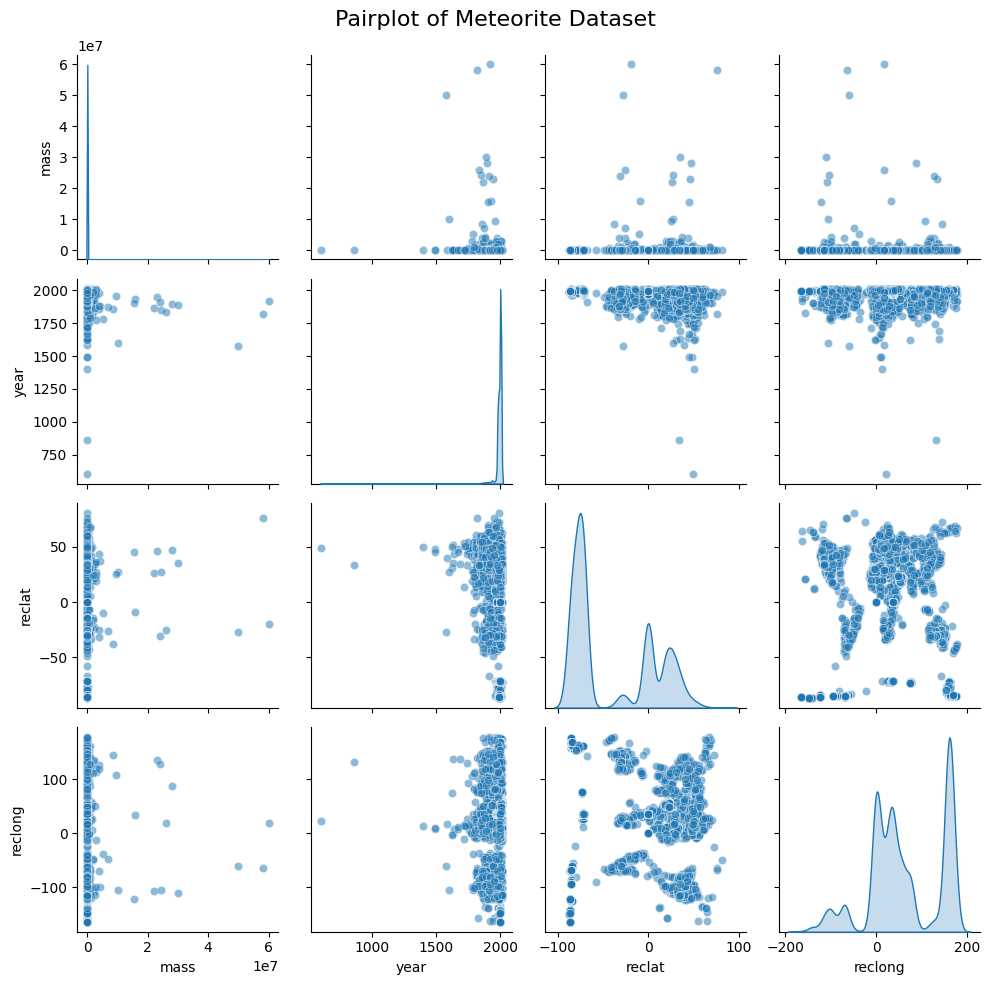

In [46]:
numerical_columns = ['mass', 'year', 'reclat', 'reclong']  # Modify based on available columns

# Create the pairplot
sns.pairplot(meteorite_file_filtered[numerical_columns], diag_kind='kde', plot_kws={'alpha':0.5})

# Customize the plot
plt.suptitle("Pairplot of Meteorite Dataset", fontsize=16)
plt.tight_layout()
plt.show()

## Conclusion
This is a huge dataset that is pretty all over the place.  I would want to do more cleaning to add some simplicity.  I am also curious about the meteorite classifications and their relevance to their location.  I would want to see if meteorite mass was connected at all to geographic location as well as type.  